# Testing of the LCD Data

In [6]:
%matplotlib inline

import numpy as np
import h5py
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

f = h5py.File("GammaEscan_1_1.h5", "r")
ecal = f["ECAL"]
hcal = f["HCAL"]
targ = f["target"]

## Visual of excited detectors for an arbitrary

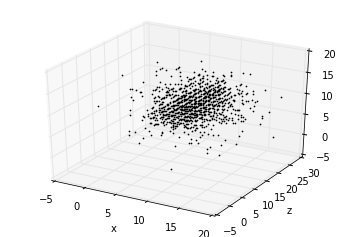

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.xlabel('x')
plt.ylabel('z')
for i in range(0,24):
    for j in range(0,24):
        for k in range(0,25):
            if ecal[500,i,j,k]!= 0:
                ax.scatter(i,k,j,s=0.5,c=ecal[500,i,j,k])
plt.show()

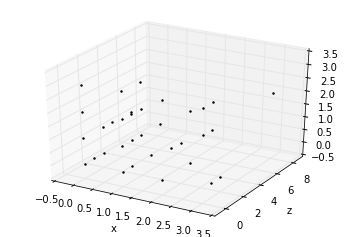

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
plt.xlabel('x')
plt.ylabel('z')
for i in range(0,4):
    for j in range(0,4):
        for k in range(0,60):
            if hcal[500,i,j,k]!= 0:
                ax.scatter(i,k,j,s=2,c=hcal[500,i,j,k])
plt.show()

## Check relation between incoming particle energy and summed detector energy

In [7]:
energy = []

for n in range(0,100):
    sum = 0
    for i in range(0,24):
        for j in range(0,24):
            for k in range(0,25):
                sum += ecal[n*5,i,j,k]

    for i in range(0,4):
        for j in range(0,4):
            for k in range(0,60):
                sum += hcal[n*5,i,j,k]
    
    energy.append(sum)

In [10]:
energy0 = []
for n in range(0,100):
    energy0.append(targ[n*5,0,1])

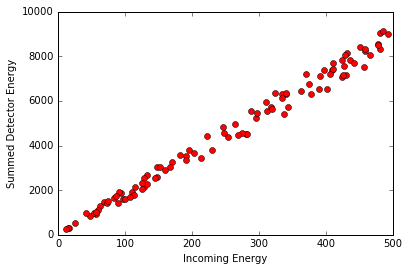

In [11]:
plt.plot(energy0, energy, 'ro')
plt.xlabel('Incoming Energy')
plt.ylabel('Summed Detector Energy')
plt.show()